In [ ]:
!pip install qutip

In [ ]:
!pip install krotov

In [ ]:
import sys
import os
import qutip
import numpy as np
import scipy
import matplotlib
import matplotlib.pylab as plt
import krotov
from scipy.fftpack import fft
from scipy.interpolate import interp1d
from qutip.control import *

from scipy.stats import unitary_group
import math as mt

In [ ]:
zsigma_zI= np.array([[1, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0],
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1]])
xsigma_z_z= np.array([[0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [1, 0, 0, 0, 0, 0, 0, 0],
           [0, -1, 0, 0, 0, 0, 0, 0],
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0]])
zIsigma_x= np.array([[0, 1, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, -1],
           [0, 0, 0, 0, 0, 0, -1, 0]])
IIsigma_z= np.array([[1, 0, 0, 0, 0, 0, 0, 0],
           [0, -1, 0, 0, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, -1]])
Isigma_zI= np.array([[1, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, -1]])
sigma_zII= np.array([[1, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0],
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, -1]])
IIsigma_x= np.array([[0, 1, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [0, 0, 0, 0, 0, 0, 1, 0]])
sigma_z_z_I= np.array([[1, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0],
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1]])
sigma_z_I_z= np.array([[1, 0, 0, 0, 0, 0, 0, 0],
           [0, -1, 0, 0, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, -1, 0, 0, 0, 0],
           [0, 0, 0, 0, -1, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1]])
Isigma_x_I=np.array([[0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 0, 0]])
sigma_x_I_I=np.array([[0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [1, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0]])
IIsigma_y = np.array([[0,  -1.j,  0,  0,  0,  0,  0,  0],
           [1.j,  0,  0,  0,  0,  0,  0,  0],
           [0,  0,  0, -1.j,  0,  0,  0,  0],
           [0,  0, 1.j,  0,  0,  0,  0,  0],
           [0,  0,  0,  0,  0, -1.j,  0,  0],
           [0,  0,  0,  0, 1.j,  0,  0,  0],
           [0,  0,  0,  0,  0,  0,  0, -1.j],
           [0,  0,  0,  0,  0,  0, 1.j,  0]])
sigma_y_I_I = np.array([[0,  0,  0,  0,  -1.j,  0,  0,  0],
           [0,  0,  0,  0,  0, -1.j,  0,  0],
           [0,  0,  0,  0,  0,  0, -1.j,  0],
           [0,  0,  0,  0,  0,  0,  0, -1.j],
           [1.j,  0,  0,  0,  0,  0,  0,  0],
           [0,  1.j,  0,  0,  0,  0,  0,  0],
           [0,  0,  1.j,  0,  0,  0,  0,  0],
           [0,  0,  0, 1.j,  0,  0,  0,  0]])
Isigma_y_I = np.array([[0,  0, -1.j,  0,  0,  0,  0,  0],
           [0,  0,  0, -1.j,  0,  0,  0,  0],
           [1.j,  0,  0,  0,  0,  0,  0,  0],
           [0,  1.j,  0,  0,  0,  0,  0,  0],
           [0,  0,  0,  0,  0,  0, -1.j,  0],
           [0,  0,  0,  0,  0,  0,  0, -1.j],
           [0,  0,   0,  0, 1.j,  0,  0,  0],
           [0,  0,  0,  0,  0, 1.j,  0,  0]])
Isigma_z_z = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
           [0, -1, 0, 0, 0, 0, 0, 0],
           [0, 0, -1, 0, 0, 0, 0, 0],
           [0, 0, 0,  1, 0, 0, 0, 0],
           [0, 0, 0, 0,  1, 0, 0, 0],
           [0, 0, 0, 0, 0, -1, 0, 0],
           [0, 0, 0, 0, 0, 0, -1, 0],
           [0, 0, 0, 0, 0, 0, 0, 1]])


In [ ]:
def guess_control1(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )

def guess_control2(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )

def guess_control3(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )
def guess_control4(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )
def guess_control5(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )
def guess_control6(t, args , ampl0=0.2):
    return ampl0 * krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, func="blackman"
    )

In [ ]:
def hamiltonian(omega1=1 ,omega2=3, omega3=2, ampl0=0.2, J1=0.047, J2=0.097, J3= 0.028  ):
    H0 = qutip.Qobj((-0.5) *( omega1 * sigma_zII +  omega2 * Isigma_zI + omega3 * IIsigma_z)+ J1* (Isigma_z_z) + J2*(sigma_z_I_z) + J3*(sigma_z_z_I))
    H1 = qutip.Qobj(IIsigma_x)
    H2 = qutip.Qobj(Isigma_x_I)
    H3 = qutip.Qobj(sigma_x_I_I)
    H4 = qutip.Qobj(IIsigma_y)
    H5 = qutip.Qobj(Isigma_y_I)
    H6 = qutip.Qobj(sigma_y_I_I)


    return [H0,[H1,guess_control1],[H2,guess_control2],[H3,guess_control3],[H4,guess_control4],[H5,guess_control5],[H6,guess_control6]]


H = hamiltonian()

In [ ]:
H

[Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
 Qobj data =
 [[-2.828  0.     0.     0.     0.     0.     0.     0.   ]
  [ 0.    -1.116  0.     0.     0.     0.     0.     0.   ]
  [ 0.     0.     0.022  0.     0.     0.     0.     0.   ]
  [ 0.     0.     0.     1.922  0.     0.     0.     0.   ]
  [ 0.     0.     0.     0.    -2.078  0.     0.     0.   ]
  [ 0.     0.     0.     0.     0.     0.022  0.     0.   ]
  [ 0.     0.     0.     0.     0.     0.     0.884  0.   ]
  [ 0.     0.     0.     0.     0.     0.     0.     3.172]],
 [Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[0. 1. 0. 0. 0. 0. 0. 0.]
   [1. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 1. 0. 0. 0. 0.]
   [0. 0. 1. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 1. 0. 0.]
   [0. 0. 0. 0. 1. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0. 0. 1. 0.]],
  <function __main__.guess_control1(t, args, ampl0=0.2)>],
 [Quantum object: dims = [[8], [8]], sh

In [ ]:
tlist = np.linspace(0, 700, 7000)

In [ ]:
proj000 = qutip.ket2dm(psi000)
proj001 = qutip.ket2dm(psi001)
proj010 = qutip.ket2dm(psi010)
proj011 = qutip.ket2dm(psi011)
proj100 = qutip.ket2dm(psi100)
proj101 = qutip.ket2dm(psi101)
proj110 = qutip.ket2dm(psi110)
proj111 = qutip.ket2dm(psi111)

In [ ]:
Toffoli= np.array([[1, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 1],
           [0, 0, 0, 0, 0, 0, 1, 0]])

In [ ]:
basis = [psi000, psi001, psi010, psi011, psi100, psi101, psi110, psi111]
basis

[Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]],
 Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket

In [ ]:
objectives = krotov.gate_objectives(
    basis_states=[psi000, psi001, psi010, psi011, psi100, psi101, psi110, psi111], gate=Toffoli, H=H
  )
objectives

[Objective[|Ψ₀(8)⟩ to |Ψ₀(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₁(8)⟩ to |Ψ₁(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₂(8)⟩ to |Ψ₂(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₃(8)⟩ to |Ψ₃(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₄(8)⟩ to |Ψ₄(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₅(8)⟩ to |Ψ₅(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t)], [H₃[8,8], u₃(t)], [H₄[8,8], u₄(t)], [H₅[8,8], u₅(t)], [H₆[8,8], u₆(t)]]],
 Objective[|Ψ₆(8)⟩ to |Ψ₇(8)⟩ via [H₀[8,8], [H₁[8,8], u₁(t)], [H₂[8,8], u₂(t

In [ ]:
def S(t):
    """Scales the Krotov methods update of the pulse value at the time t"""
    return krotov.shapes.flattop(
        t, t_start=0, t_stop=700, t_rise=0.3, t_fall=0.3, func='blackman'
   )

In [ ]:
pulse_options = {H[1][1]: dict(lambda_a=1, update_shape=S),
                 H[2][1]: dict(lambda_a=1, update_shape=S),
                 H[3][1]: dict(lambda_a=1, update_shape=S),
                 H[4][1]: dict(lambda_a=1, update_shape=S),
                 H[5][1]: dict(lambda_a=1, update_shape=S),
                 H[6][1]: dict(lambda_a=1, update_shape=S)}

In [ ]:
opt_result = krotov.optimize_pulses(
    objectives,
    pulse_options=pulse_options,
    tlist=tlist,
    propagator=krotov.propagators.expm,
    chi_constructor=krotov.functionals.chis_sm,
    info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_sm),
    check_convergence=krotov.convergence.Or(
        krotov.convergence.value_below('1e-3', name='J_T'),
        krotov.convergence.delta_below(1e-5),
        krotov.convergence.check_monotonic_error,
    ),
    store_all_pulses=True,
 )

opt_result


iter.      J_T   ∑∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     9.58e-01    0.00e+00   9.58e-01        n/a        n/a   292
1     3.78e-01    1.17e-01   4.94e-01  -5.81e-01  -4.64e-01   634
2     6.86e-02    1.40e-01   2.08e-01  -3.09e-01  -1.69e-01   626
3     1.79e-02    2.51e-02   4.30e-02  -5.07e-02  -2.56e-02   630
4     5.34e-03    6.28e-03   1.16e-02  -1.25e-02  -6.25e-03   632
5     2.45e-03    1.46e-03   3.90e-03  -2.89e-03  -1.44e-03   616
6     1.33e-03    5.61e-04   1.89e-03  -1.11e-03  -5.52e-04   617
7     8.06e-04    2.65e-04   1.07e-03  -5.26e-04  -2.61e-04   619


Krotov Optimization Result
--------------------------
- Started at 2023-07-30 13:59:06
- Number of objectives: 8
- Number of iterations: 7
- Reason for termination: Reached convergence: J_T < 1e-3
- Ended at 2023-07-30 15:16:56 (1:17:50)

In [ ]:
def plot_pulse(pulse, tlist, xlimit=None):
    fig, ax = plt.subplots()
    if callable(pulse):
        pulse = np.array([pulse(t, None) for t in tlist])
    ax.plot(tlist, pulse)
    ax.set_xlabel('time (ns)')
    ax.set_ylabel('pulse amplitude')
    if xlimit is not None:
        ax.set_xlim(xlimit)
    plt.show(fig)

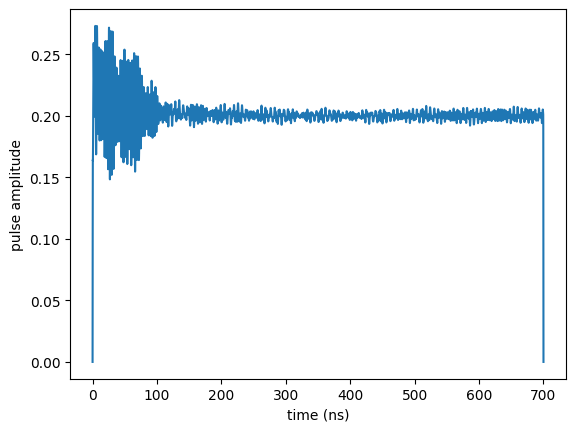

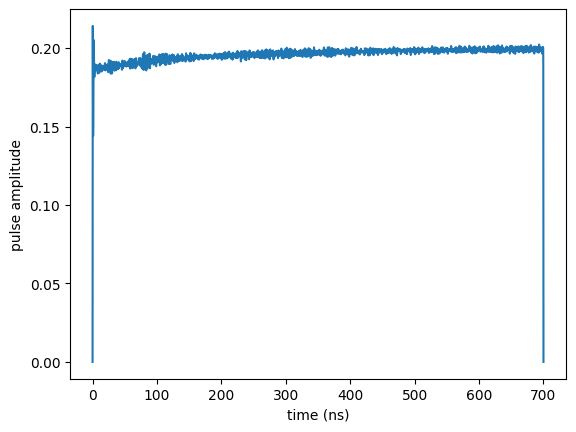

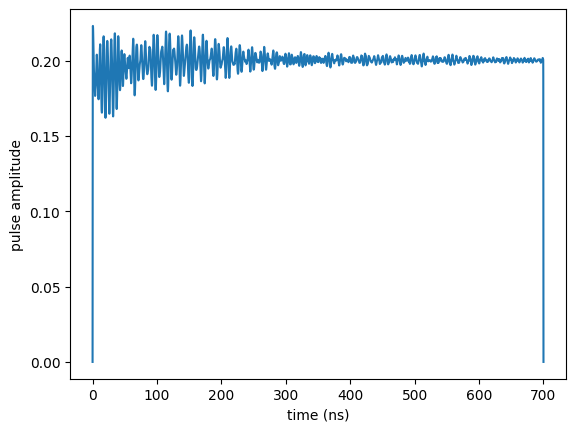

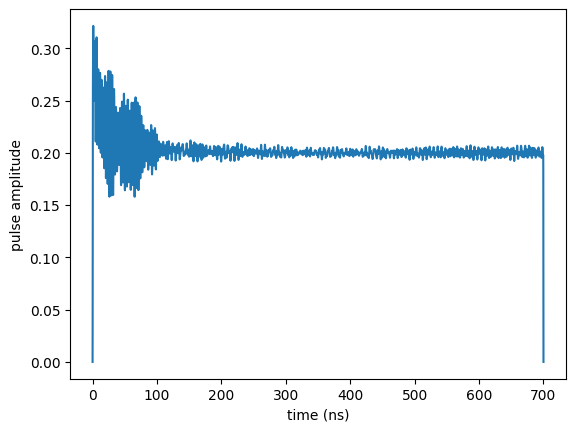

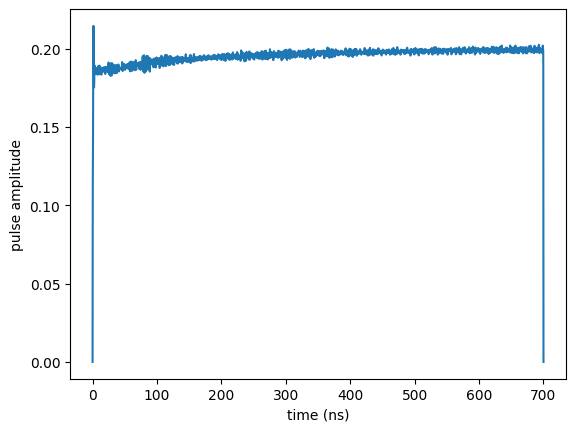

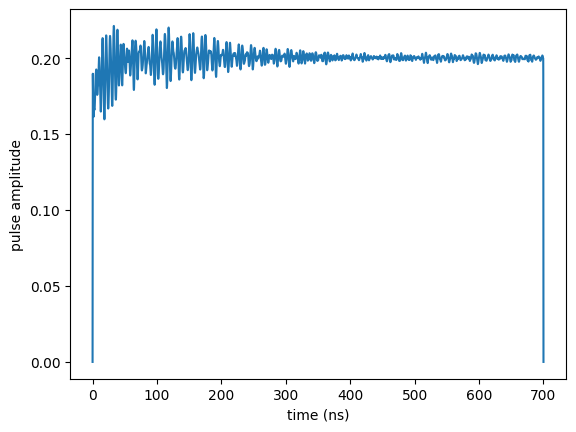

In [ ]:
plot_pulse(opt_result.optimized_controls[0], tlist)

plot_pulse(opt_result.optimized_controls[1], tlist)

plot_pulse(opt_result.optimized_controls[2], tlist)

plot_pulse(opt_result.optimized_controls[3], tlist)

plot_pulse(opt_result.optimized_controls[4], tlist)

plot_pulse(opt_result.optimized_controls[5], tlist)

In [ ]:
ket_000 = np.array([1, 0, 0, 0, 0, 0, 0, 0])
ket_001 = np.array([0, 1, 0, 0, 0, 0, 0, 0])
ket_010 = np.array([0, 0, 1, 0, 0, 0, 0, 0])
ket_011 = np.array([0, 0, 0, 1, 0, 0, 0, 0])
ket_100 = np.array([0, 0, 0, 0, 1, 0, 0, 0])
ket_101 = np.array([0, 0, 0, 0, 0, 1, 0, 0])
ket_110 = np.array([0, 0, 0, 0, 0, 0, 1, 0])
ket_111 = np.array([0, 0, 0, 0, 0, 0, 0, 1])

bra_000 = ket_000.reshape((8,1))
bra_001 = ket_001.reshape((8,1))
bra_010 = ket_010.reshape((8,1))
bra_011 = ket_011.reshape((8,1))
bra_100 = ket_100.reshape((8,1))
bra_101 = ket_101.reshape((8,1))
bra_110 = ket_110.reshape((8,1))
bra_111 = ket_111.reshape((8,1))

In [ ]:
obs000 = []
obs001 = []
obs010 = []
obs011 = []
obs100 = []
obs101 = []
obs110 = []
obs111 = []

psi_tj = ket_000
for i in range(7000):
   opt1 = opt_result.optimized_controls[0][i]
   opt2 = opt_result.optimized_controls[1][i]
   opt3 = opt_result.optimized_controls[2][i]
   opt4 = opt_result.optimized_controls[3][i]
   opt5 = opt_result.optimized_controls[4][i]
   opt6 = opt_result.optimized_controls[5][i]

   H_t = (-0.5) *( omega1 * sigma_zII +  omega2 * Isigma_zI + omega3 * IIsigma_z)+ J1* (Isigma_z_z) + J2*(sigma_z_I_z) + J3*(sigma_z_z_I) + opt1 * IIsigma_x + opt2 * Isigma_x_I + opt3 * sigma_x_I_I + opt4 * IIsigma_y + opt5 * Isigma_y_I + opt6 * sigma_y_I_I

   U = sp.linalg.expm(-1j * H_t * dt)
   psi_tj= np.matmul(U , psi_tj)

   psi_t000= np.dot(np.transpose(bra_000) , psi_tj)
   psi_t001= np.dot(np.transpose(bra_001), psi_tj)
   psi_t010= np.dot(np.transpose(bra_010) , psi_tj)
   psi_t011= np.dot(np.transpose(bra_011) , psi_tj)
   psi_t100= np.dot(np.transpose(bra_100) , psi_tj)
   psi_t101= np.dot(np.transpose(bra_101) , psi_tj)
   psi_t110= np.dot(np.transpose(bra_110) , psi_tj)
   psi_t111= np.dot(np.transpose(bra_111) , psi_tj)
   psi2_t000j= abs(psi_t000[0])**2
   psi2_t001j= abs(psi_t001[0])**2
   psi2_t010j= abs(psi_t010[0])**2
   psi2_t011j= abs(psi_t011[0])**2
   psi2_t100j= abs(psi_t100[0])**2
   psi2_t101j= abs(psi_t101[0])**2
   psi2_t110j= abs(psi_t110[0])**2
   psi2_t111j= abs(psi_t111[0])**2

   obs000.append(psi2_t000j)
   obs001.append(psi2_t001j)
   obs010.append(psi2_t010j)
   obs011.append(psi2_t011j)
   obs100.append(psi2_t100j)
   obs101.append(psi2_t101j)
   obs110.append(psi2_t110j)
   obs111.append(psi2_t111j)

print(obs000)
print(obs001)
print(obs010)
print(obs011)
print(obs100)
print(obs101)
print(obs110)
print(obs111)

[1.0, 0.999929460183678, 0.9985384454241749, 0.9931372353709431, 0.9835190957883877, 0.9703417333571144, 0.9540649424291336, 0.9351288132337121, 0.9139548075314049, 0.8909542001419093, 0.8665406574140624, 0.8411430832822442, 0.815214857316149, 0.7892363569125348, 0.7637091188098614, 0.7391418355073136, 0.7160301324826119, 0.6948332790428029, 0.6759513739727989, 0.6597061090982625, 0.6463271872517955, 0.6359452248167174, 0.6285908564014155, 0.6241990059708279, 0.6226169540584261, 0.6236148396090364, 0.6268974506787919, 0.6321164532855177, 0.6388825064352621, 0.6467769931749393, 0.6553633708463092, 0.6641984095165352, 0.6728438133381713, 0.6808788373963446, 0.6879144429959736, 0.6936092261956193, 0.6976868224957627, 0.6999538322144158, 0.7003166895738675, 0.6987954951052697, 0.6955327812027642, 0.690795522130825, 0.6849693563668655, 0.6785448013392419, 0.6720960287214348, 0.6662533976496399, 0.6616713589286928, 0.6589935631021815, 0.6588170796402286, 0.661657604785752, 0.6679174165994963

In [ ]:
def plot_population1(pop_000, pop_001, pop_010, pop_011, pop_100, pop_101, pop_110, pop_111, tlist):
  plt.plot(tlist, pop_000, label="000")
  plt.plot(tlist, pop_001, label="001")
  plt.plot(tlist, pop_010, label="010")
  plt.plot(tlist, pop_011, label="011")
  plt.plot(tlist, pop_100, label="100")
  plt.plot(tlist, pop_101, label="101")
  plt.plot(tlist, pop_110, label="110")
  plt.plot(tlist, pop_111, label="111")
  plt.xlabel("time (ns)")
  plt.ylabel("population")
  plt.legend()
  plt.show()


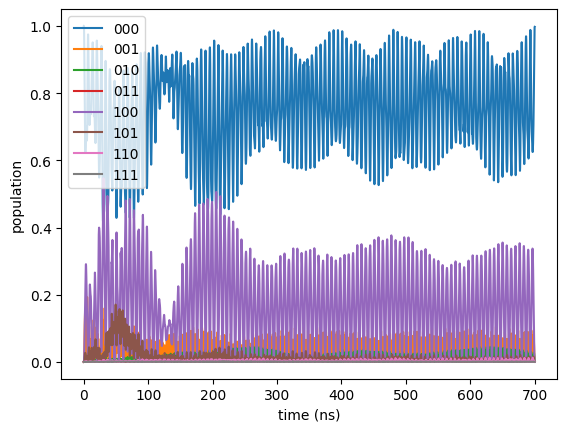

In [ ]:
plot_population1(obs000, obs001, obs010, obs011, obs100, obs101, obs110, obs111,tlist)

In [ ]:
obs000 = []
obs001 = []
obs010 = []
obs011 = []
obs100 = []
obs101 = []
obs110 = []
obs111 = []

psi_tj = ket_001
for i in range(7000):
   opt1 = opt_result.optimized_controls[0][i]
   opt2 = opt_result.optimized_controls[1][i]
   opt3 = opt_result.optimized_controls[2][i]
   opt4 = opt_result.optimized_controls[3][i]
   opt5 = opt_result.optimized_controls[4][i]
   opt6 = opt_result.optimized_controls[5][i]

   H_t = (-0.5) *( omega1 * sigma_zII +  omega2 * Isigma_zI + omega3 * IIsigma_z)+ J1* (Isigma_z_z) + J2*(sigma_z_I_z) + J3*(sigma_z_z_I) + opt1 * IIsigma_x + opt2 * Isigma_x_I + opt3 * sigma_x_I_I + opt4 * IIsigma_y + opt5 * Isigma_y_I + opt6 * sigma_y_I_I

   U = sp.linalg.expm(-1j * H_t * dt)
   psi_tj= np.matmul(U , psi_tj)
  #bra_psi_tj= psi_tj.reshape((8,1))
   psi_t000= np.dot(np.transpose(bra_000) , psi_tj)
   psi_t001= np.dot(np.transpose(bra_001), psi_tj)
   psi_t010= np.dot(np.transpose(bra_010) , psi_tj)
   psi_t011= np.dot(np.transpose(bra_011) , psi_tj)
   psi_t100= np.dot(np.transpose(bra_100) , psi_tj)
   psi_t101= np.dot(np.transpose(bra_101) , psi_tj)
   psi_t110= np.dot(np.transpose(bra_110) , psi_tj)
   psi_t111= np.dot(np.transpose(bra_111) , psi_tj)
   psi2_t000j= abs(psi_t000[0])**2
   psi2_t001j= abs(psi_t001[0])**2
   psi2_t010j= abs(psi_t010[0])**2
   psi2_t011j= abs(psi_t011[0])**2
   psi2_t100j= abs(psi_t100[0])**2
   psi2_t101j= abs(psi_t101[0])**2
   psi2_t110j= abs(psi_t110[0])**2
   psi2_t111j= abs(psi_t111[0])**2

   obs000.append(psi2_t000j)
   obs001.append(psi2_t001j)
   obs010.append(psi2_t010j)
   obs011.append(psi2_t011j)
   obs100.append(psi2_t100j)
   obs101.append(psi2_t101j)
   obs110.append(psi2_t110j)
   obs111.append(psi2_t111j)

print(obs000)
print(obs001)
print(obs010)
print(obs011)
print(obs100)
print(obs101)
print(obs110)
print(obs111)

[1.536984434947687e-37, 2.011854527969432e-05, 0.000440991958354715, 0.0021882823040909397, 0.005557513126773631, 0.010566020251510924, 0.01724899612806551, 0.02557979437878704, 0.035454861510843906, 0.046685478294824445, 0.058996553013545096, 0.0720327132602702, 0.08537176054175008, 0.09854498264656752, 0.11106289983759415, 0.12244401867276862, 0.13224345940317603, 0.14007822581300697, 0.145646508132576, 0.1487395983032014, 0.1492464047145591, 0.14715178044589017, 0.14253062270640526, 0.13553984834696642, 0.12640998120896424, 0.11543740876358746, 0.10297761640183646, 0.08943907592634372, 0.07527704614867071, 0.06098634461807262, 0.04709212350865024, 0.03413777690502331, 0.0226693001393731, 0.013215735613391925, 0.006265815482132161, 0.002241567670375773, 0.0014704364848309582, 0.0041582412876026145, 0.010365849052065064, 0.019992563640802766, 0.032768819240678336, 0.04825984290810613, 0.06588071345801562, 0.08492197362580371, 0.10458391567134043, 0.12401701108780504, 0.142365697438969

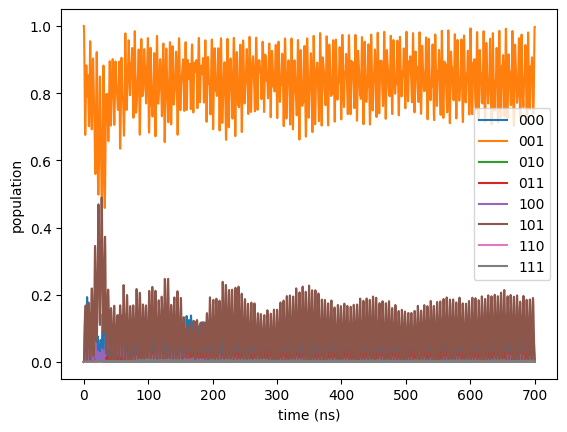

In [ ]:
plot_population1(obs000, obs001, obs010, obs011, obs100, obs101, obs110, obs111,tlist)

In [ ]:
obs000 = []
obs001 = []
obs010 = []
obs011 = []
obs100 = []
obs101 = []
obs110 = []
obs111 = []

psi_tj = ket_010
for i in range(7000):
   opt1 = opt_result.optimized_controls[0][i]
   opt2 = opt_result.optimized_controls[1][i]
   opt3 = opt_result.optimized_controls[2][i]
   opt4 = opt_result.optimized_controls[3][i]
   opt5 = opt_result.optimized_controls[4][i]
   opt6 = opt_result.optimized_controls[5][i]

   H_t = (-0.5) *( omega1 * sigma_zII +  omega2 * Isigma_zI + omega3 * IIsigma_z)+ J1* (Isigma_z_z) + J2*(sigma_z_I_z) + J3*(sigma_z_z_I) + opt1 * IIsigma_x + opt2 * Isigma_x_I + opt3 * sigma_x_I_I + opt4 * IIsigma_y + opt5 * Isigma_y_I + opt6 * sigma_y_I_I

   U = sp.linalg.expm(-1j * H_t * dt)
   psi_tj= np.matmul(U , psi_tj)
  #bra_psi_tj= psi_tj.reshape((8,1))
   psi_t000= np.dot(np.transpose(bra_000) , psi_tj)
   psi_t001= np.dot(np.transpose(bra_001), psi_tj)
   psi_t010= np.dot(np.transpose(bra_010) , psi_tj)
   psi_t011= np.dot(np.transpose(bra_011) , psi_tj)
   psi_t100= np.dot(np.transpose(bra_100) , psi_tj)
   psi_t101= np.dot(np.transpose(bra_101) , psi_tj)
   psi_t110= np.dot(np.transpose(bra_110) , psi_tj)
   psi_t111= np.dot(np.transpose(bra_111) , psi_tj)
   psi2_t000j= abs(psi_t000[0])**2
   psi2_t001j= abs(psi_t001[0])**2
   psi2_t010j= abs(psi_t010[0])**2
   psi2_t011j= abs(psi_t011[0])**2
   psi2_t100j= abs(psi_t100[0])**2
   psi2_t101j= abs(psi_t101[0])**2
   psi2_t110j= abs(psi_t110[0])**2
   psi2_t111j= abs(psi_t111[0])**2

   obs000.append(psi2_t000j)
   obs001.append(psi2_t001j)
   obs010.append(psi2_t010j)
   obs011.append(psi2_t011j)
   obs100.append(psi2_t100j)
   obs101.append(psi2_t101j)
   obs110.append(psi2_t110j)
   obs111.append(psi2_t111j)

print(obs000)
print(obs001)
print(obs010)
print(obs011)
print(obs100)
print(obs101)
print(obs110)
print(obs111)

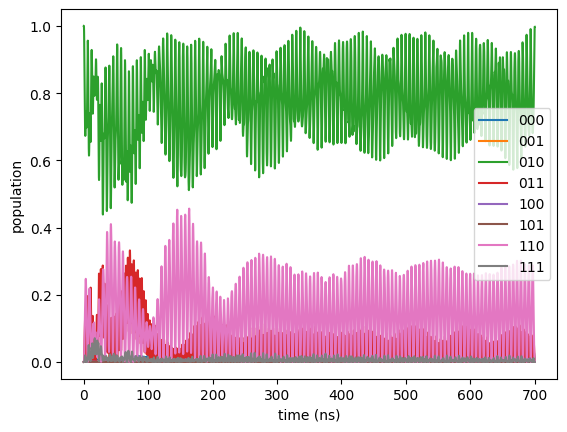

In [ ]:
plot_population1(obs000, obs001, obs010, obs011, obs100, obs101, obs110, obs111,tlist)

In [ ]:
obs000 = []
obs001 = []
obs010 = []
obs011 = []
obs100 = []
obs101 = []
obs110 = []
obs111 = []

psi_tj = ket_011
for i in range(7000):
   opt1 = opt_result.optimized_controls[0][i]
   opt2 = opt_result.optimized_controls[1][i]
   opt3 = opt_result.optimized_controls[2][i]
   opt4 = opt_result.optimized_controls[3][i]
   opt5 = opt_result.optimized_controls[4][i]
   opt6 = opt_result.optimized_controls[5][i]

   H_t = (-0.5) *( omega1 * sigma_zII +  omega2 * Isigma_zI + omega3 * IIsigma_z)+ J1* (Isigma_z_z) + J2*(sigma_z_I_z) + J3*(sigma_z_z_I) + opt1 * IIsigma_x + opt2 * Isigma_x_I + opt3 * sigma_x_I_I + opt4 * IIsigma_y + opt5 * Isigma_y_I + opt6 * sigma_y_I_I

   U = sp.linalg.expm(-1j * H_t * dt)
   psi_tj= np.matmul(U , psi_tj)

   psi_t000= np.dot(np.transpose(bra_000) , psi_tj)
   psi_t001= np.dot(np.transpose(bra_001), psi_tj)
   psi_t010= np.dot(np.transpose(bra_010) , psi_tj)
   psi_t011= np.dot(np.transpose(bra_011) , psi_tj)
   psi_t100= np.dot(np.transpose(bra_100) , psi_tj)
   psi_t101= np.dot(np.transpose(bra_101) , psi_tj)
   psi_t110= np.dot(np.transpose(bra_110) , psi_tj)
   psi_t111= np.dot(np.transpose(bra_111) , psi_tj)
   psi2_t000j= abs(psi_t000[0])**2
   psi2_t001j= abs(psi_t001[0])**2
   psi2_t010j= abs(psi_t010[0])**2
   psi2_t011j= abs(psi_t011[0])**2
   psi2_t100j= abs(psi_t100[0])**2
   psi2_t101j= abs(psi_t101[0])**2
   psi2_t110j= abs(psi_t110[0])**2
   psi2_t111j= abs(psi_t111[0])**2

   obs000.append(psi2_t000j)
   obs001.append(psi2_t001j)
   obs010.append(psi2_t010j)
   obs011.append(psi2_t011j)
   obs100.append(psi2_t100j)
   obs101.append(psi2_t101j)
   obs110.append(psi2_t110j)
   obs111.append(psi2_t111j)

print(obs000)
print(obs001)
print(obs010)
print(obs011)
print(obs100)
print(obs101)
print(obs110)
print(obs111)

[2.3503852645610092e-74, 5.035423699015949e-10, 2.1109591526183033e-07, 4.515095804072514e-06, 2.5011361185444388e-05, 7.674237877052131e-05, 0.00017145045855960548, 0.0003122462738301357, 0.000490942662086984, 0.0006888328782826993, 0.0008807302258137297, 0.0010410437546688603, 0.001150013444227632, 0.0011982221003828347, 0.0011881316265794607, 0.0011324042576550816, 0.0010497806955990369, 0.0009599437954293208, 0.0008789120005212981, 0.0008161152426193807, 0.0007736197325025659, 0.0007472686379538827, 0.0007290259567678307, 0.0007096585958935765, 0.0006810370331762172, 0.0006376529931927991, 0.0005772902581789806, 0.0005010223858020681, 0.0004127978879769701, 0.0003188301835664845, 0.00022690421078642534, 0.00014561991084708977, 8.356288065647248e-05, 4.8426347118934304e-05, 4.616907396184166e-05, 8.033133809566125e-05, 0.0001516154251913915, 0.00025777549748344725, 0.00039379288751555444, 0.0005522793477429867, 0.0007240669835065436, 0.0008989821397197051, 0.0010668089107359518, 0.0

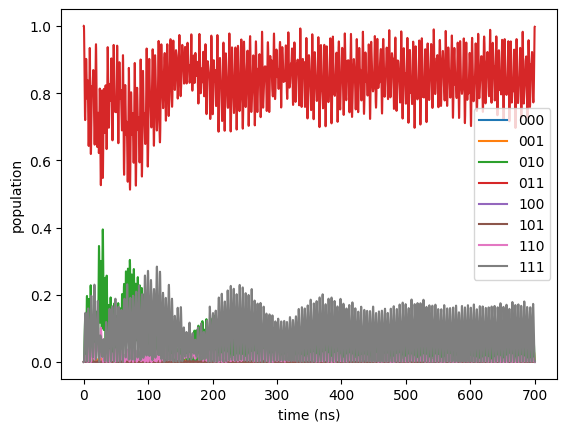

In [ ]:
plot_population1(obs000, obs001, obs010, obs011, obs100, obs101, obs110, obs111,tlist)

In [ ]:
obs000 = []
obs001 = []
obs010 = []
obs011 = []
obs100 = []
obs101 = []
obs110 = []
obs111 = []

psi_tj = ket_100
for i in range(7000):
   opt1 = opt_result.optimized_controls[0][i]
   opt2 = opt_result.optimized_controls[1][i]
   opt3 = opt_result.optimized_controls[2][i]
   opt4 = opt_result.optimized_controls[3][i]
   opt5 = opt_result.optimized_controls[4][i]
   opt6 = opt_result.optimized_controls[5][i]

   H_t = (-0.5) *( omega1 * sigma_zII +  omega2 * Isigma_zI + omega3 * IIsigma_z)+ J1* (Isigma_z_z) + J2*(sigma_z_I_z) + J3*(sigma_z_z_I) + opt1 * IIsigma_x + opt2 * Isigma_x_I + opt3 * sigma_x_I_I + opt4 * IIsigma_y + opt5 * Isigma_y_I + opt6 * sigma_y_I_I

   U = sp.linalg.expm(-1j * H_t * dt)
   psi_tj= np.matmul(U , psi_tj)

   psi_t000= np.dot(np.transpose(bra_000) , psi_tj)
   psi_t001= np.dot(np.transpose(bra_001), psi_tj)
   psi_t010= np.dot(np.transpose(bra_010) , psi_tj)
   psi_t011= np.dot(np.transpose(bra_011) , psi_tj)
   psi_t100= np.dot(np.transpose(bra_100) , psi_tj)
   psi_t101= np.dot(np.transpose(bra_101) , psi_tj)
   psi_t110= np.dot(np.transpose(bra_110) , psi_tj)
   psi_t111= np.dot(np.transpose(bra_111) , psi_tj)
   psi2_t000j= abs(psi_t000[0])**2
   psi2_t001j= abs(psi_t001[0])**2
   psi2_t010j= abs(psi_t010[0])**2
   psi2_t011j= abs(psi_t011[0])**2
   psi2_t100j= abs(psi_t100[0])**2
   psi2_t101j= abs(psi_t101[0])**2
   psi2_t110j= abs(psi_t110[0])**2
   psi2_t111j= abs(psi_t111[0])**2

   obs000.append(psi2_t000j)
   obs001.append(psi2_t001j)
   obs010.append(psi2_t010j)
   obs011.append(psi2_t011j)
   obs100.append(psi2_t100j)
   obs101.append(psi2_t101j)
   obs110.append(psi2_t110j)
   obs111.append(psi2_t111j)

print(obs000)
print(obs001)
print(obs010)
print(obs011)
print(obs100)
print(obs101)
print(obs110)
print(obs111)

[1.5400218671839911e-37, 2.537421573374961e-05, 0.0005404646106402833, 0.0025970358443693554, 0.006359469416963239, 0.011634298344110311, 0.018272561959024644, 0.026107235467406637, 0.034960747524356, 0.04465202408907113, 0.055003500915959784, 0.06584839290833672, 0.07703813185383272, 0.08844940351363213, 0.09998980492365842, 0.11160097131608981, 0.12325818215264063, 0.13496592355630815, 0.14674952953049314, 0.15864366688713116, 0.17067891310538585, 0.1828679234409541, 0.1951927000497199, 0.20759432298632316, 0.21996625077037277, 0.23215199180426063, 0.24394760032639845, 0.2551090595690042, 0.26536418725475, 0.2744282651526969, 0.28202220555423463, 0.2878917749561052, 0.2918262323556369, 0.29367471430406994, 0.29335880344026627, 0.2908799465558457, 0.2863207513081819, 0.2798397026435493, 0.27165949592802685, 0.2620499299724182, 0.2513070271503718, 0.2397306008710392, 0.2276027366621972, 0.21516952123646957, 0.2026278677588457, 0.1901185540822659, 0.17772576753510222, 0.1654826826513512

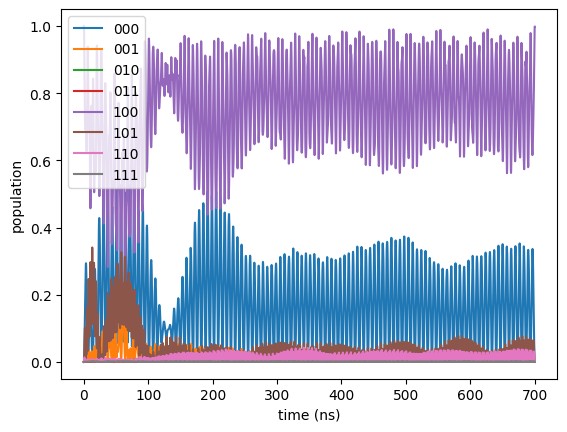

In [ ]:
plot_population1(obs000, obs001, obs010, obs011, obs100, obs101, obs110, obs111,tlist)

In [ ]:
obs000 = []
obs001 = []
obs010 = []
obs011 = []
obs100 = []
obs101 = []
obs110 = []
obs111 = []

psi_tj = ket_101
for i in range(7000):
   opt1 = opt_result.optimized_controls[0][i]
   opt2 = opt_result.optimized_controls[1][i]
   opt3 = opt_result.optimized_controls[2][i]
   opt4 = opt_result.optimized_controls[3][i]
   opt5 = opt_result.optimized_controls[4][i]
   opt6 = opt_result.optimized_controls[5][i]

   H_t = (-0.5) *( omega1 * sigma_zII +  omega2 * Isigma_zI + omega3 * IIsigma_z)+ J1* (Isigma_z_z) + J2*(sigma_z_I_z) + J3*(sigma_z_z_I) + opt1 * IIsigma_x + opt2 * Isigma_x_I + opt3 * sigma_x_I_I + opt4 * IIsigma_y + opt5 * Isigma_y_I + opt6 * sigma_y_I_I

   U = sp.linalg.expm(-1j * H_t * dt)
   psi_tj= np.matmul(U , psi_tj)

   psi_t000= np.dot(np.transpose(bra_000) , psi_tj)
   psi_t001= np.dot(np.transpose(bra_001), psi_tj)
   psi_t010= np.dot(np.transpose(bra_010) , psi_tj)
   psi_t011= np.dot(np.transpose(bra_011) , psi_tj)
   psi_t100= np.dot(np.transpose(bra_100) , psi_tj)
   psi_t101= np.dot(np.transpose(bra_101) , psi_tj)
   psi_t110= np.dot(np.transpose(bra_110) , psi_tj)
   psi_t111= np.dot(np.transpose(bra_111) , psi_tj)
   psi2_t000j= abs(psi_t000[0])**2
   psi2_t001j= abs(psi_t001[0])**2
   psi2_t010j= abs(psi_t010[0])**2
   psi2_t011j= abs(psi_t011[0])**2
   psi2_t100j= abs(psi_t100[0])**2
   psi2_t101j= abs(psi_t101[0])**2
   psi2_t110j= abs(psi_t110[0])**2
   psi2_t111j= abs(psi_t111[0])**2

   obs000.append(psi2_t000j)
   obs001.append(psi2_t001j)
   obs010.append(psi2_t010j)
   obs011.append(psi2_t011j)
   obs100.append(psi2_t100j)
   obs101.append(psi2_t101j)
   obs110.append(psi2_t110j)
   obs111.append(psi2_t111j)

print(obs000)
print(obs001)
print(obs010)
print(obs011)
print(obs100)
print(obs101)
print(obs110)
print(obs111)

[2.3649075132876488e-74, 5.100792195989216e-10, 2.3783842315638903e-07, 5.6798701614410646e-06, 3.5480400936029256e-05, 0.00012422115180511166, 0.0003211444767129384, 0.0006870175882858502, 0.0012887268486706644, 0.0021916499401918874, 0.0034503503923455753, 0.005098574524520959, 0.007139908821216951, 0.009540672798942267, 0.012226558702891811, 0.015084112131041074, 0.017967411242863104, 0.020709404209381246, 0.023136539973374615, 0.025084798080028288, 0.026415108900550592, 0.02702643166111019, 0.026865280723337697, 0.025931070885822187, 0.024277135386222663, 0.02200758681205473, 0.019270362103789466, 0.01624689471486568, 0.013138972880400515, 0.010153522701213629, 0.007486297930940995, 0.005305720140989541, 0.0037383233593816343, 0.002857341945898295, 0.002675876173247775, 0.003145736252891169, 0.004162497056331564, 0.00557653717584961, 0.007208991963780666, 0.008870778092031663, 0.01038232279967961, 0.011591493661659798, 0.012387523489441629, 0.012709394169896065, 0.01254802297548539

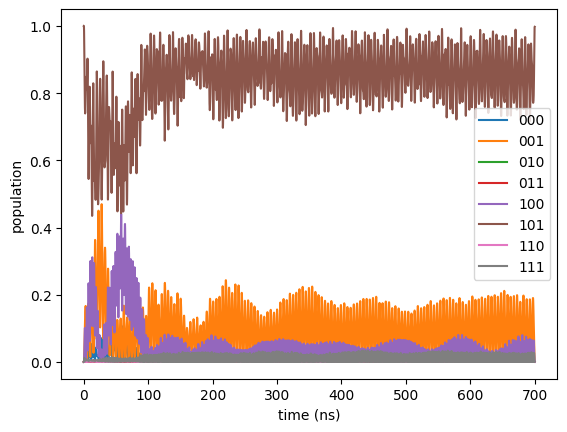

In [ ]:
plot_population1(obs000, obs001, obs010, obs011, obs100, obs101, obs110, obs111,tlist)

In [ ]:
obs000 = []
obs001 = []
obs010 = []
obs011 = []
obs100 = []
obs101 = []
obs110 = []
obs111 = []

psi_tj = ket_110
for i in range(7000):
   opt1 = opt_result.optimized_controls[0][i]
   opt2 = opt_result.optimized_controls[1][i]
   opt3 = opt_result.optimized_controls[2][i]
   opt4 = opt_result.optimized_controls[3][i]
   opt5 = opt_result.optimized_controls[4][i]
   opt6 = opt_result.optimized_controls[5][i]

   H_t = (-0.5) *( omega1 * sigma_zII +  omega2 * Isigma_zI + omega3 * IIsigma_z)+ J1* (Isigma_z_z) + J2*(sigma_z_I_z) + J3*(sigma_z_z_I) + opt1 * IIsigma_x + opt2 * Isigma_x_I + opt3 * sigma_x_I_I + opt4 * IIsigma_y + opt5 * Isigma_y_I + opt6 * sigma_y_I_I

   U = sp.linalg.expm(-1j * H_t * dt)
   psi_tj= np.matmul(U , psi_tj)

   psi_t000= np.dot(np.transpose(bra_000) , psi_tj)
   psi_t001= np.dot(np.transpose(bra_001), psi_tj)
   psi_t010= np.dot(np.transpose(bra_010) , psi_tj)
   psi_t011= np.dot(np.transpose(bra_011) , psi_tj)
   psi_t100= np.dot(np.transpose(bra_100) , psi_tj)
   psi_t101= np.dot(np.transpose(bra_101) , psi_tj)
   psi_t110= np.dot(np.transpose(bra_110) , psi_tj)
   psi_t111= np.dot(np.transpose(bra_111) , psi_tj)
   psi2_t000j= abs(psi_t000[0])**2
   psi2_t001j= abs(psi_t001[0])**2
   psi2_t010j= abs(psi_t010[0])**2
   psi2_t011j= abs(psi_t011[0])**2
   psi2_t100j= abs(psi_t100[0])**2
   psi2_t101j= abs(psi_t101[0])**2
   psi2_t110j= abs(psi_t110[0])**2
   psi2_t111j= abs(psi_t111[0])**2

   obs000.append(psi2_t000j)
   obs001.append(psi2_t001j)
   obs010.append(psi2_t010j)
   obs011.append(psi2_t011j)
   obs100.append(psi2_t100j)
   obs101.append(psi2_t101j)
   obs110.append(psi2_t110j)
   obs111.append(psi2_t111j)

print(obs000)
print(obs001)
print(obs010)
print(obs011)
print(obs100)
print(obs101)
print(obs110)
print(obs111)

[2.355953005468192e-74, 6.353341901960572e-10, 2.591386234489725e-07, 5.377492912823422e-06, 2.8800151862493923e-05, 8.534844310989166e-05, 0.00018434875753725965, 0.0003255223529620754, 0.000498492417055116, 0.0006853545255392512, 0.0008651466059997572, 0.0010187593168682677, 0.0011329430995464767, 0.0012025170027500018, 0.001230499837319278, 0.001226467300450028, 0.0012038282853169709, 0.001176837195122128, 0.0011580426811767012, 0.001156610269328164, 0.0011776569872832244, 0.001222484365759575, 0.0012894326523950714, 0.0013750087769343502, 0.0014749517648520397, 0.001584977088468372, 0.0017010694797095398, 0.0018193473955201117, 0.0019356644274557586, 0.002045199951690088, 0.0021422901545203985, 0.0022206569997554435, 0.0022740390611999976, 0.002297073222183954, 0.002286180469580806, 0.0022402072237902746, 0.002160659935627129, 0.0020515031843741476, 0.0019186140925044081, 0.0017690545939876262, 0.0016103237176407158, 0.0014497009845735687, 0.0012937229790149036, 0.00114778097338707

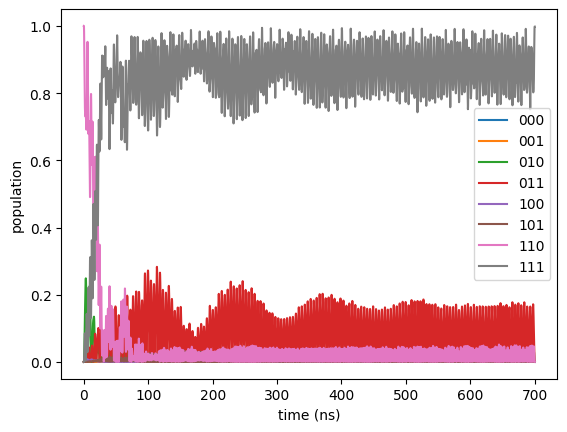

In [ ]:
plot_population1(obs000, obs001, obs010, obs011, obs100, obs101, obs110, obs111,tlist)

In [ ]:
obs000 = []
obs001 = []
obs010 = []
obs011 = []
obs100 = []
obs101 = []
obs110 = []
obs111 = []

psi_tj = ket_111
for i in range(7000):
   opt1 = opt_result.optimized_controls[0][i]
   opt2 = opt_result.optimized_controls[1][i]
   opt3 = opt_result.optimized_controls[2][i]
   opt4 = opt_result.optimized_controls[3][i]
   opt5 = opt_result.optimized_controls[4][i]
   opt6 = opt_result.optimized_controls[5][i]

   H_t = (-0.5) *( omega1 * sigma_zII +  omega2 * Isigma_zI + omega3 * IIsigma_z)+ J1* (Isigma_z_z) + J2*(sigma_z_I_z) + J3*(sigma_z_z_I) + opt1 * IIsigma_x + opt2 * Isigma_x_I + opt3 * sigma_x_I_I + opt4 * IIsigma_y + opt5 * Isigma_y_I + opt6 * sigma_y_I_I

   U = sp.linalg.expm(-1j * H_t * dt)
   psi_tj= np.matmul(U , psi_tj)

   psi_t000= np.dot(np.transpose(bra_000) , psi_tj)
   psi_t001= np.dot(np.transpose(bra_001), psi_tj)
   psi_t010= np.dot(np.transpose(bra_010) , psi_tj)
   psi_t011= np.dot(np.transpose(bra_011) , psi_tj)
   psi_t100= np.dot(np.transpose(bra_100) , psi_tj)
   psi_t101= np.dot(np.transpose(bra_101) , psi_tj)
   psi_t110= np.dot(np.transpose(bra_110) , psi_tj)
   psi_t111= np.dot(np.transpose(bra_111) , psi_tj)
   psi2_t000j= abs(psi_t000[0])**2
   psi2_t001j= abs(psi_t001[0])**2
   psi2_t010j= abs(psi_t010[0])**2
   psi2_t011j= abs(psi_t011[0])**2
   psi2_t100j= abs(psi_t100[0])**2
   psi2_t101j= abs(psi_t101[0])**2
   psi2_t110j= abs(psi_t110[0])**2
   psi2_t111j= abs(psi_t111[0])**2

   obs000.append(psi2_t000j)
   obs001.append(psi2_t001j)
   obs010.append(psi2_t010j)
   obs011.append(psi2_t011j)
   obs100.append(psi2_t100j)
   obs101.append(psi2_t101j)
   obs110.append(psi2_t110j)
   obs111.append(psi2_t111j)

print(obs000)
print(obs001)
print(obs010)
print(obs011)
print(obs100)
print(obs101)
print(obs110)
print(obs111)

[3.614998099860447e-111, 1.2761490323480362e-14, 1.1367000394378046e-10, 1.1681773181983472e-08, 1.5880606487137008e-07, 8.944374597921469e-07, 3.1506260591287267e-06, 8.229146414488811e-06, 1.7378790951726026e-05, 3.119111893127608e-05, 4.908708011174224e-05, 6.917951029060018e-05, 8.86574231269222e-05, 0.00010460438483656285, 0.00011494850337622793, 0.00011915674660256858, 0.00011837953203012994, 0.0001149807786792064, 0.00011164419815965255, 0.0001104100599853819, 0.00011200130813481083, 0.00011565715169770856, 0.00011948339619475515, 0.00012114682688661518, 0.00011865173848588694, 0.00011095369886284516, 9.825705639264643e-05, 8.195798143271331e-05, 6.429191503443742e-05, 4.78035762435972e-05, 3.477946600968926e-05, 2.677551565224337e-05, 2.43425222584432e-05, 2.7002109043476607e-05, 3.3461509342190377e-05, 4.199066286025387e-05, 5.084171993197803e-05, 5.858831433520282e-05, 6.43036605411215e-05, 6.756515240550181e-05, 6.83371861615355e-05, 6.68150494706277e-05, 6.330167967647456e-

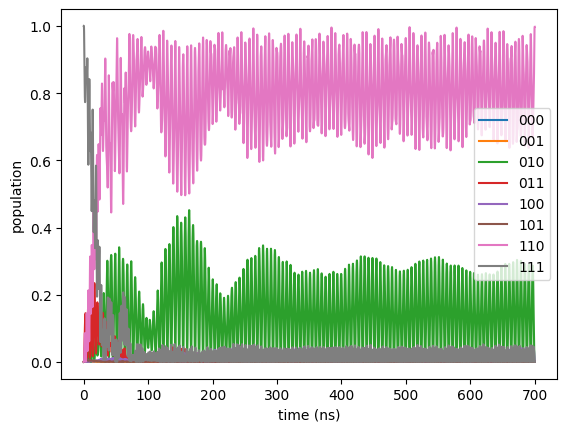

In [ ]:
plot_population1(obs000, obs001, obs010, obs011, obs100, obs101, obs110, obs111,tlist)